In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import uadapy.distribution as distribution
import uadapy.dr.uapca_revisited as uapca_revisited
import uadapy.plotting.plots_2d as plots_2d

# Loading data
We use the example used in the UAPCA Revisited paper.

In [ ]:
# Define Means and Covariances
m1 = np.array([0, -1])
m2 = np.array([0, 0])
m3 = np.array([0, 1])

# Add small epsilon to Covariance matrices to make them positive definite
epsilon = 1e-6
C1 = np.array([[epsilon, 0], [0, epsilon]])
C2 = np.array([[7/2, 0], [0, epsilon]])
C3 = np.array([[epsilon, 0], [0, epsilon]])

# Create Distribution objects
distribs_hi = [
    distribution.Distribution(multivariate_normal(m1, C1)),
    distribution.Distribution(multivariate_normal(m2, C2)),
    distribution.Distribution(multivariate_normal(m3, C3))
]

# Applying UAPCA Revisited
Uncertainty Aware PCA Revisited can be applied directly to reduce the data to a user-defined target dimension. We reduce to 2 dimensions to match Figure 7 (center right) of the paper.

In [3]:
projected_samples = uapca_revisited(distribs_hi, n_dims=2, n_samples=50000)

# Wrapping Samples into Distribution objects
The projection returns samples in the reduced dimension for each input distribution. We wrap these samples into Distribution objects.

In [4]:
distribs_lo = [distribution.Distribution(samples) for samples in projected_samples]

# Visualizing data
The data can be directly visualized, for example as a contour plot. This closely resembles Figure 7. We use KDE to calculate the density while the paper uses the Hann function which produces a slightly different output.

(<Figure size 640x480 with 1 Axes>, <Axes: >)

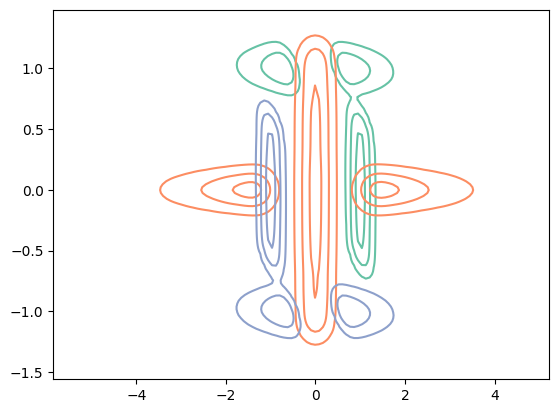

In [5]:
plots_2d.plot_contour(distribs_lo, quantiles=[30, 78, 97], seed=0)